# Preprocessing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

### Read csv file

In [2]:
df = pd.read_csv('../final.csv', index_col=0)

In [3]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'])
df.dtypes

camis                             int64
name                             object
boro                             object
building                         object
street                           object
zipcode                           int64
phone                             int64
cuisine_description              object
inspection_date          datetime64[ns]
action                           object
violation_code                   object
violation_description            object
critical_flag                    object
score                           float64
inspection_type                  object
address                          object
zip_code                          int64
rating                          float64
price                            object
cuisine                          object
dtype: object

### We will use following `features` to predict the `score`.

#### features

- `boro` *
- `inspection_date` *
- `inspection_type` *
- `rating`
- `price` *
- `cuisine`


`*` = feature that has to be numerized

#### target

- score

### Let's numerize the starred features.

### - `boro`
- 0 = manhattan
- 1 = bronx
- 2 = brooklyn
- 3 = queens
- 4 = staten island

In [4]:
boro_dict = {'manhattan': 0,
            "bronx": 1,
            'brooklyn': 2,
            'queens': 3,
            'staten island': 4}

for i in boro_dict:
    df['boro'].replace(i, boro_dict[i], inplace=True)


### - `inspection_date`

- Inspection date will be one hot encoded according to summer season (June, July, or August) or not. 

In [5]:
df['month'] = df['inspection_date'].dt.month
df['year'] = df['inspection_date'].dt.year
df['summer'] = df.apply(lambda row: 1 if (row.month >= 6) & (row.month <= 8) else 0, axis=1)

### - `inspection_type`

- Inspection date will be one hot encoded according to summer season (June, July, or August) or not. 

In [6]:
df['initial_inspection'] = df.apply(lambda row: 1 if row.inspection_type == "Cycle Inspection / Initial Inspection" else 0, axis=1)

### - `price`

- 0 = `$`
- 1 = `$$`
- 2 = `$$$`
- 3 = `$$$$`

In [7]:
df['price'] = df.apply(lambda row: len(row.price)-1, axis=1)
df

,camis,name,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,...,inspection_type,address,zip_code,rating,price,cuisine,month,year,summer,initial_inspection
0,30075445,morris park bake shop,1,1007,morris park ave,10462,7188924968,Bakery,2017-05-18,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,1007 morris park ave,10462,4.0,1,bakeries,5,2017,0,1
1,30075445,morris park bake shop,1,1007,morris park ave,10462,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,1007 morris park ave,10462,4.0,1,bakeries,5,2018,0,1
2,30075445,morris park bake shop,1,1007,morris park ave,10462,7188924968,Bakery,2019-05-16,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,1007 morris park ave,10462,4.0,1,bakeries,5,2019,0,1
3,40361618,sal's deli,3,12908,20 avenue,11356,7186619498,Delicatessen,2016-09-13,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,12908 20 ave,11356,4.5,0,delis,9,2016,0,1
4,40361618,sal's deli,3,12908,20 avenue,11356,7186619498,Delicatessen,2017-12-01,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,12908 20 ave,11356,4.5,0,delis,12,2017,0,1
5,40361618,sal's deli,3,12908,20 avenue,11356,7186619498,Delicatessen,2018-01-24,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,12908 20 ave,11356,4.5,0,delis,1,2018,0,0
6,40361618,sal's deli,3,12908,20 avenue,11356,7186619498,Delicatessen,2018-06-05,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,12908 20 ave,11356,4.5,0,delis,6,2018,1,1
7,40361618,sal's deli,3,12908,20 avenue,11356,7186619498,Delicatessen,2019-05-16,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,12908 20 ave,11356,4.5,0,delis,5,2019,0,1
8,40362715,the country cafe,0,60,wall street,10005,3474279132,Sandwiches/Salads/Mixed Buffet,2016-09-06,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,60 wall st,10005,2.0,0,sandwiches,9,2016,0,1
9,40362715,the country cafe,0,60,wall street,10005,3474279132,Sandwiches/Salads/Mixed Buffet,2016-10-07,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,60 wall st,10005,2.0,0,sandwiches,10,2016,0,0


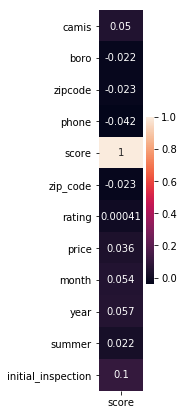

In [8]:
plt.figure(figsize=(1,7))
sns.heatmap(df.corr()[['score']], annot=True)
plt.savefig('../correlation')

In [9]:
# Get dummies
df = df.join(pd.get_dummies(df['boro']))
df = df.join(pd.get_dummies(df['year']))
df = df.join(pd.get_dummies(df['inspection_type']))
df = df.join(pd.get_dummies(df['cuisine']))

In [10]:
df = df.drop(columns=['camis', 'boro', 'year', 'month', 'name', 'building', 'street', 'phone', 'cuisine_description', 'inspection_date', 'action', 'violation_code', 'violation_description', 'critical_flag', 'inspection_type', 'address', 'zipcode', 'zip_code', 'cuisine'])

In [ ]:
#sns.pairplot(df)

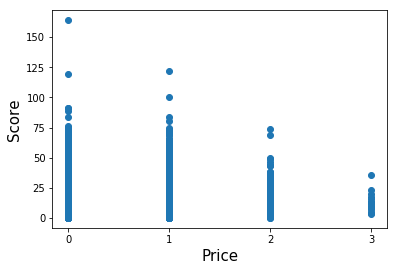

In [12]:
plt.scatter(df['price'], df['score'])
plt.xlabel('Price', size=15)
plt.ylabel('Score', size=15)
plt.xticks([0, 1, 2, 3]);

In [13]:
# For regression
df.to_csv('../preprocessed_data.csv')

In [14]:
# For multiclass Classification.
df['score'] = df.apply(lambda row: 0 if row.score <= 13 else (1 if row.score <=27 else 2) , axis=1)

In [15]:
df.score.value_counts()

0    4862
1    1744
2     828
Name: score, dtype: int64

In [16]:
df.to_csv('../preprocessed_data_classification_Z.csv')

In [17]:
# For binary classification with threshold of 13.
df['score'] = df.apply(lambda row: 0 if row.score <= 13 else 1, axis=1)

In [18]:
df.to_csv('../preprocessed_data_classification_Z_A.csv')

In [19]:
# For binary classification with threshold of 27
df['score'] = df.apply(lambda row: 0 if row.score <= 27 else 1, axis=1)

In [21]:
df.to_csv('../preprocessed_data_classification_Z_B.csv')